## Showing the img

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('R.jpg')

In [3]:
img

array([[[  0, 105,  53],
        [  0, 105,  53],
        [  0, 104,  53],
        ...,
        [  3,  85,  43],
        [  2,  81,  42],
        [  2,  79,  41]],

       [[  0, 106,  57],
        [  0, 106,  57],
        [  1, 106,  55],
        ...,
        [  4,  86,  44],
        [  4,  83,  44],
        [  3,  80,  42]],

       [[  1, 108,  59],
        [  2, 107,  58],
        [  2, 107,  56],
        ...,
        [  6,  88,  46],
        [  5,  84,  45],
        [  4,  81,  43]],

       ...,

       [[ 80, 170, 104],
        [ 59, 156,  90],
        [  1, 108,  46],
        ...,
        [ 18, 127,  71],
        [ 16, 127,  71],
        [ 19, 130,  74]],

       [[ 53, 143,  77],
        [ 38, 135,  69],
        [  7, 114,  52],
        ...,
        [  9, 118,  62],
        [ 10, 119,  63],
        [ 11, 122,  66]],

       [[ 26, 116,  50],
        [ 12, 109,  43],
        [  5, 112,  50],
        ...,
        [  2, 109,  53],
        [  2, 111,  55],
        [  6, 115,  59]]

In [4]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape
# shape: height, width, channels(rgb)

(627, 670, 3)

In [6]:
img=cv2.imread('R.jpg',cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE
print(img, img.shape)

[[ 77  77  77 ...  63  60  59]
 [ 79  79  79 ...  64  62  60]
 [ 81  80  80 ...  66  63  61]
 ...
 [140 125  77 ...  98  98 101]
 [113 104  83 ...  89  90  93]
 [ 86  78  81 ...  80  82  86]] (627, 670)


In [7]:
cv_show('gray',img)

In [8]:
cv2.imwrite('grey_cat.png', img)
# save the image

True

In [9]:
print(type(img), img.size, img.dtype)

<class 'numpy.ndarray'> 420090 uint8


## Video opening and processing

In [10]:
vc=cv2.VideoCapture('cat.mp4')
# vc.read()

In [11]:
if vc.isOpened():
    open, frame = vc.read()
else:
    open=False

In [12]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert the color to grey
        cv2.imshow('result', gray)
        if cv2.waitKey(15) &  0xFF ==27: # set the playing time and exit key 0xFF ==27 means esc
            break

vc.release()
cv2.destroyAllWindows()

## Processing the img data

In [13]:
img = cv2.imread('R.jpg')
cat = img [100:300, 300:500] # cutting the specific area of the img
cv_show('cat', cat)

In [14]:
b, g, r = cv2.split(img) # extract blue, green and red
print(b)
cv_show('blue', b)
img_1 = cv2.merge((b, g, r)) # merge the different color into one image
cv_show('color', img_1)

[[ 0  0  0 ...  3  2  2]
 [ 0  0  1 ...  4  4  3]
 [ 1  2  2 ...  6  5  4]
 ...
 [80 59  1 ... 18 16 19]
 [53 38  7 ...  9 10 11]
 [26 12  5 ...  2  2  6]]


In [15]:
img_1[:,:,1] = 0 # height, width, channels
img_1[:,:,2] = 0 # turn the B and R into 0
cv_show('green',img_1)
# print(img_1)

## Boundary padding

In [16]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)


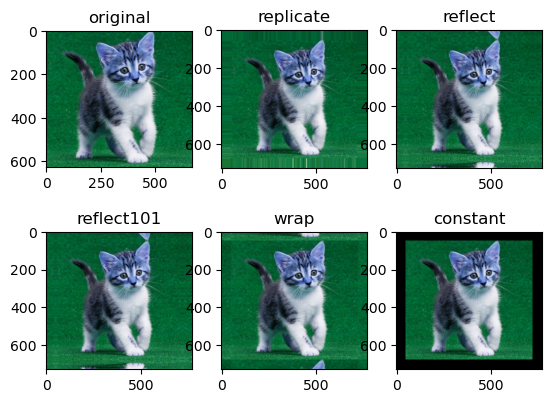

In [17]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

plt.show()


In [18]:
vc=cv2.VideoCapture('cat.mp4')
# vc.read()

## numerical computation

In [19]:
cat_img = cv2.imread('R.jpg')
dog_img = cv2.imread('Dog.jpg')
print(cat_img.shape, dog_img.shape)

(627, 670, 3) (2497, 3296, 3)


(627, 670, 3)


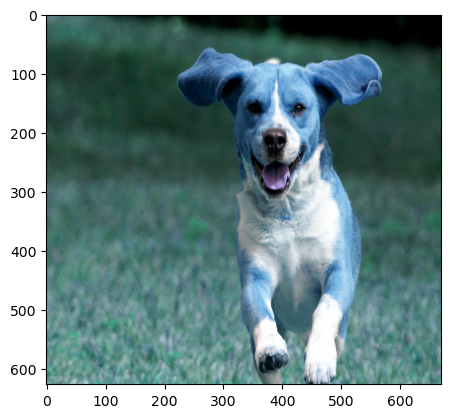

In [20]:
dogy_img = cv2.resize(dog_img,(670, 627))
print(dogy_img.shape)
plt.imshow(dogy_img)
plt.show()

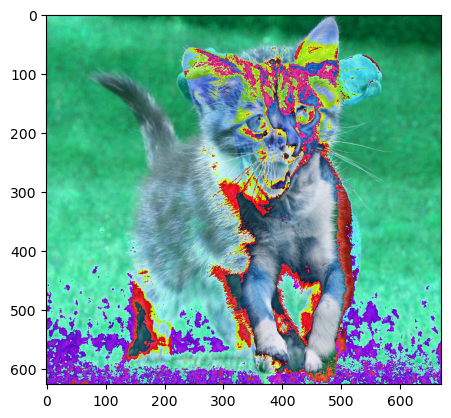

In [21]:
merged=cat_img + dogy_img
plt.imshow(merged)
plt.show()

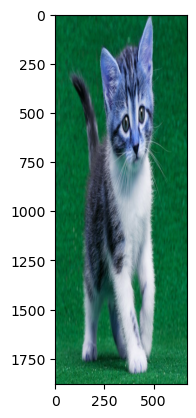

In [22]:
copy_img = cv2.resize(cat_img,(0,0), fx=1, fy=3)
plt.imshow(copy_img)
plt.show()

# Morphological operations
## 1. Erosion

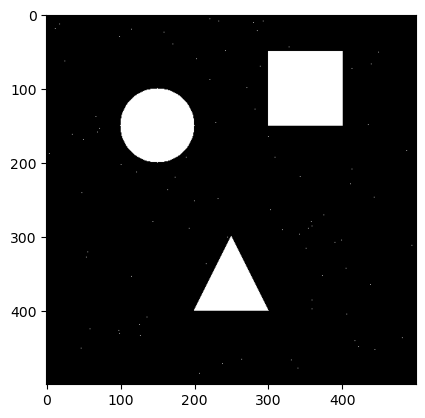

In [23]:
e_img  = cv2.imread('binary_image_with_shapes.png')
plt.imshow(e_img)
plt.show()

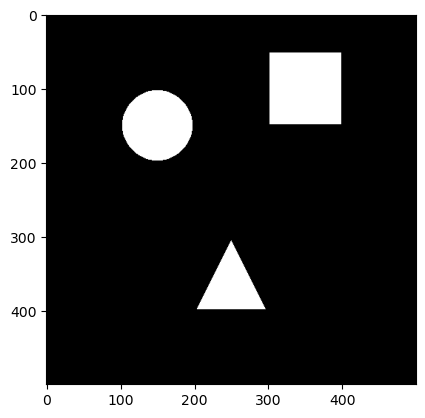

In [24]:
kernel = np.ones((5,5), np.uint8) # kernel influnces the the extent of erosion
erosion = cv2.erode(e_img, kernel, iterations = 1) # iteration specifies how many times the erosion operation should be applied
plt.imshow(erosion)
plt.show()

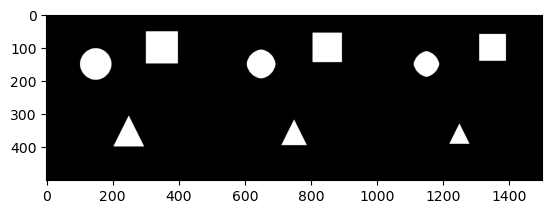

In [25]:
erosion_1 = cv2.erode(e_img, kernel, iterations = 1)
erosion_2 = cv2.erode(e_img, kernel, iterations = 3)
erosion_3 = cv2.erode(e_img, kernel, iterations = 5)
e_merged = np.hstack((erosion_1, erosion_2, erosion_3))
plt.imshow(e_merged)
plt.show()

## 2. Dilation

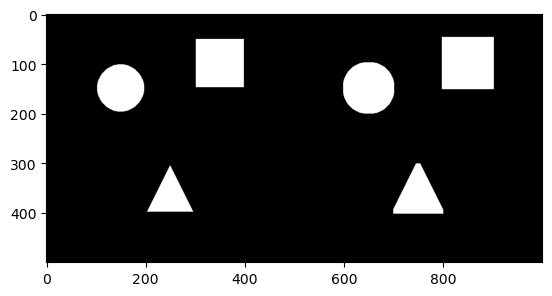

In [26]:
dilation = cv2.dilate(erosion, kernel, iterations = 2)
together = np.hstack((erosion, dilation))
plt.imshow(together)
plt.show()

## 3. Opening operation and Closiong operation

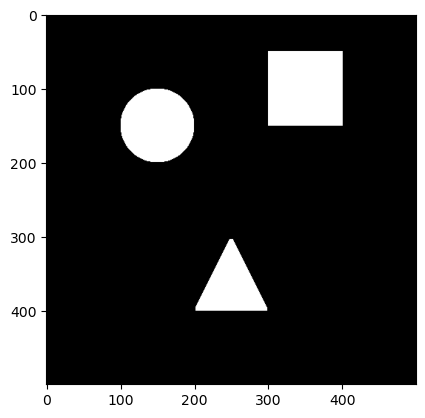

In [27]:
# Opening: Erosion first and then Dilation
import cv2
e_img = cv2.imread('binary_image_with_shapes.png')
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(e_img, cv2.MORPH_OPEN, kernel)

def pp(img):
    plt.imshow(img)
    plt.show()

pp(opening)

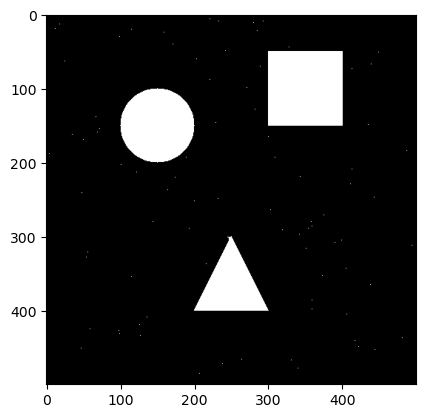

In [28]:
# Closing: Dilation first and then Erosion
closing = cv2.morphologyEx(e_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

## 4. Gradient operation

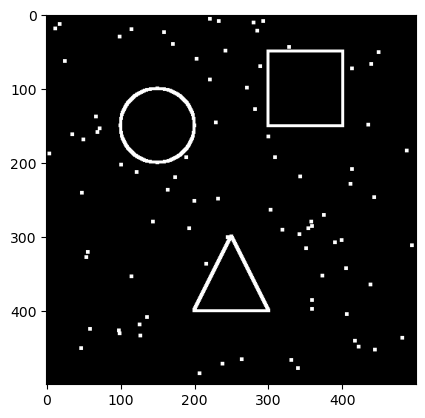

In [29]:
# edge detecting, comparing the difference between the dilation and the erosion
gradient = cv2.morphologyEx(e_img, cv2.MORPH_GRADIENT, kernel)
pp(gradient)

## 5. Top-hat and Black-hat

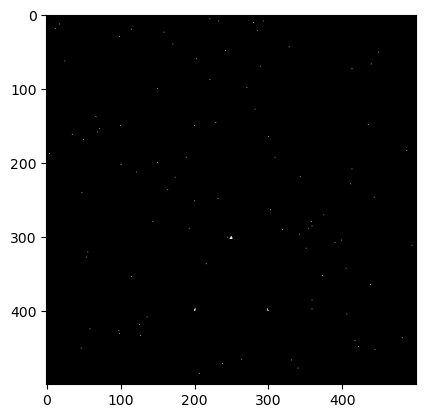

In [30]:
# Top-hat: the difference between the original and the opening
tophat = cv2.morphologyEx(e_img, cv2.MORPH_TOPHAT, kernel)
pp(tophat)

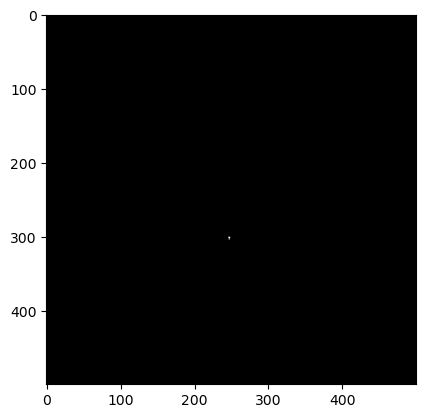

In [31]:
# Black-hat: The difference between the Closing and the original
blackhat = cv2.morphologyEx(e_img, cv2.MORPH_BLACKHAT, kernel)
pp(blackhat)

# Image Gradient---Sobel Operator

      
```
dst = cv.Sobel(src, ddepth, dx, dy, ksize)
```
- ddepth is the deepth of the img
- dx and dy is the horizontal and vertical direction
- ksize is the size of sobel operator 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1020.0..1020.0].


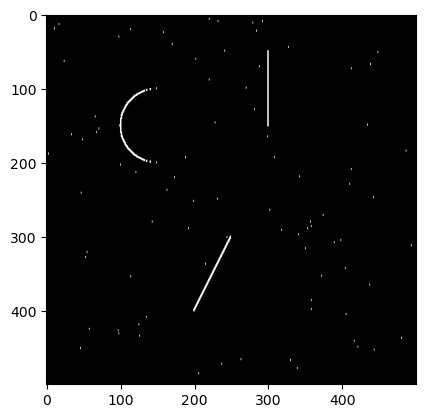

In [32]:
sobelx = cv2.Sobel(e_img, cv2.CV_64F, 1, 0, ksize=3)
pp(sobelx)

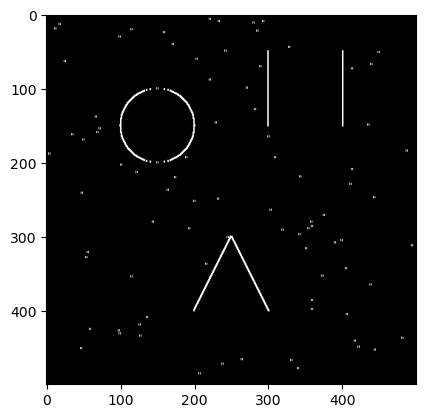

In [33]:
sobelx_1 = cv2.convertScaleAbs(sobelx)
pp(sobelx_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1020.0..1020.0].


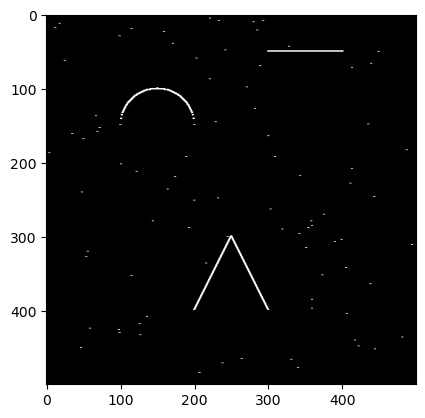

In [34]:
sobely = cv2.Sobel(e_img, cv2.CV_64F, 0, 1, ksize=3)
pp(sobely)
sobely_1 = cv2.convertScaleAbs(sobely)

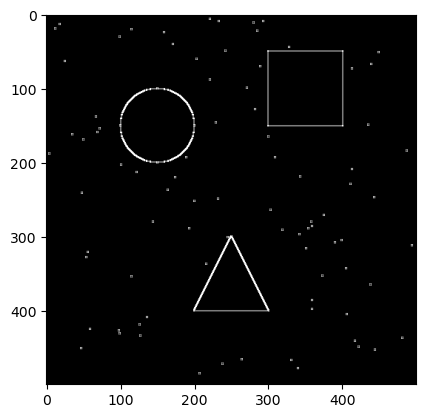

In [35]:
sobelxy = cv2.addWeighted(sobelx_1, 0.5, sobely_1, 0.5, 0)
pp(sobelxy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255.0..255.0].


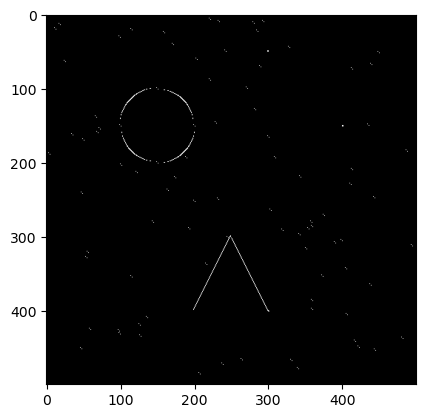

In [36]:
# not recmmanded
sobelxy_1 = cv2.Sobel(e_img, cv2.CV_64F, 1, 1, ksize=3)
pp(sobelxy_1)

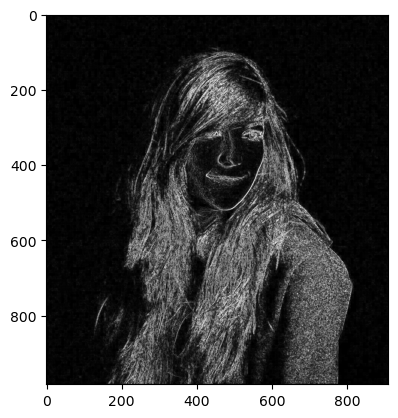

In [37]:
sobel_img = cv2.imread('sobel.jpg')
sobelx = cv2.Sobel(sobel_img, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(sobel_img, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
pp(sobelxy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-468.0..480.0].


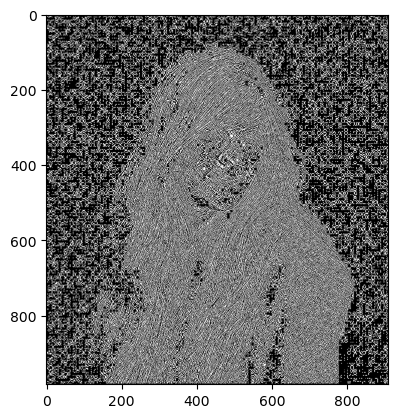

In [38]:
sobelxy_1 = cv2.Sobel(sobel_img, cv2.CV_64F, 1, 1, ksize=3)
pp(sobelxy_1)

## Scharr operator & Laplacian operator

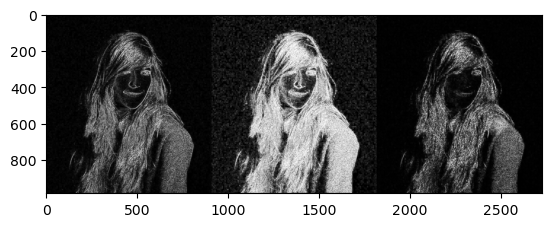

In [39]:
sobel_img = cv2.imread('sobel.jpg')
sobelx = cv2.Sobel(sobel_img, cv2.CV_64F, 1, 0, ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(sobel_img, cv2.CV_64F, 0, 1, ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

sobel_img = cv2.imread('sobel.jpg')
scharrx = cv2.Scharr(sobel_img, cv2.CV_64F, 1, 0)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.Scharr(sobel_img, cv2.CV_64F, 0, 1)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

laplacian = cv2.Laplacian(sobel_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

merged = np.hstack((sobelxy, scharrxy, laplacian))
pp(merged)

## Thresholding
```
ret, dst = cv2.threshold(src, thresh, maxval, type)
```
- src: the import img, only single channel image
- dst: the output img
- thresh: the value between 0~255, used to distinguish the black and white
- maxval: usually 255
- type: THRESH_BINARY(maxval or 0), THRESH_BINARY_INV(0 or maxval), THRESH_TRUNC(thresh and original), THRESH_TOZERO(original and 0), THRESH_TOZERO_INV(maxval and original)

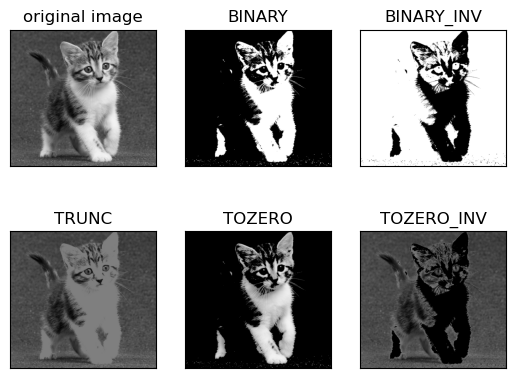

In [40]:
grey_img = cv2.imread('grey_cat.png')
ret, tresh1 = cv2.threshold(grey_img, 127, 255, cv2.THRESH_BINARY)
ret, tresh2 = cv2.threshold(grey_img, 127, 255, cv2.THRESH_BINARY_INV)
ret, tresh3 = cv2.threshold(grey_img, 127, 255, cv2.THRESH_TRUNC)
ret, tresh4 = cv2.threshold(grey_img, 127, 255, cv2.THRESH_TOZERO)
ret, tresh5 = cv2.threshold(grey_img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['original image','BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [grey_img, tresh1, tresh2, tresh3, tresh4, tresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Image Smoothing

In [41]:
img = cv2.imread('film_photo.jpg')
cv_show('original',img)

In [42]:
blur = cv2.blur(img, (5,5)) # avg value of the matrix, (5,5) is the size of the matrix
cv_show('blur',blur)

In [43]:
box = cv2.boxFilter(img,-1, (5,5), normalize = False) # same as top, but when the normalize is False, sum value
cv_show('box', box)

In [44]:
gaussian = cv2.GaussianBlur(img, (5,5), 1) # the center value has the biggest weight
cv_show('gaussian', gaussian)

In [45]:
median = cv2.medianBlur(img, 5) # choose the median value
cv_show('median', median)

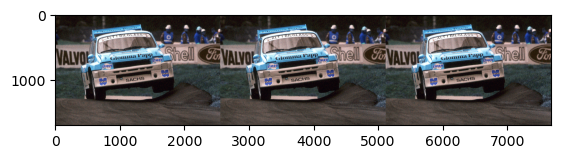

In [46]:
merged = np.hstack((blur, gaussian, median))
# cv_show('comperation',merged)
pp(merged)